# **EDA FOR HOUSE PRICE PREDICTION**

In [14]:
# Import required libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
# Load the housing dataset
df = pd.read_csv("housing.csv")

In [16]:
# Display the first few rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
# Display the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
# Display the statistical summary of the dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [19]:
# Count the occurrences of each category in the 'ocean_proximity' column
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

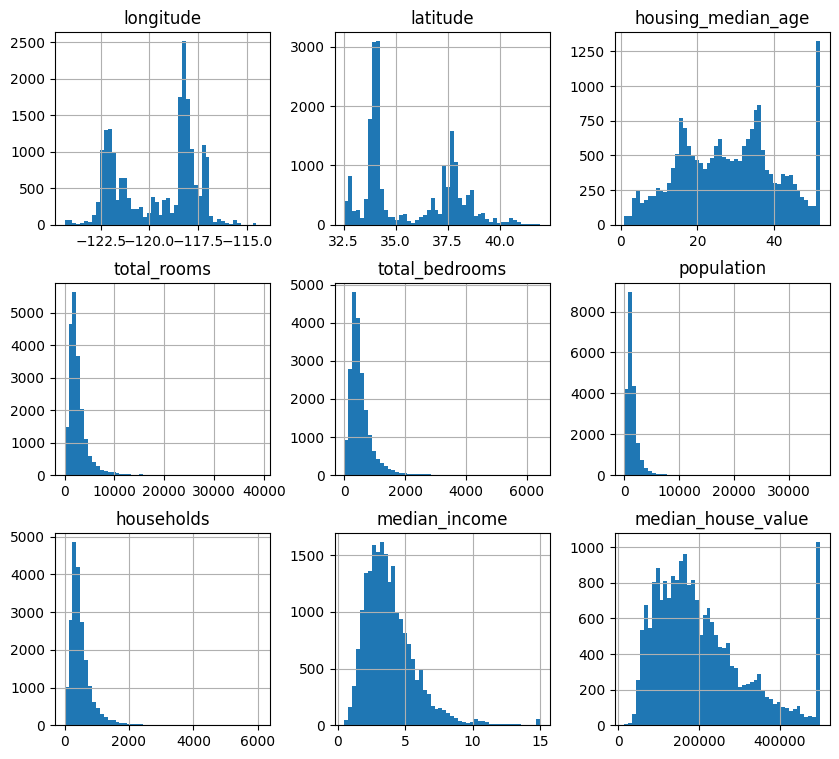

In [20]:
# Visualize the distribution of numerical features in the dataset
df.hist(bins=50,figsize=(10,9))
plt.show()

In [21]:
# Show correlation of numerical features with 'median_house_value'
df.select_dtypes(include=["number"]).corr()["median_house_value"].sort_values(ascending=False)



median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

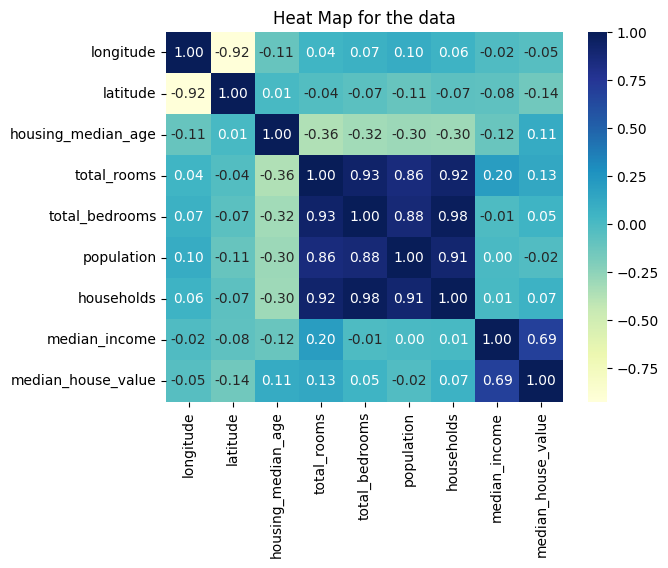

In [22]:
# Plotting Heat-Map to better visualize correlated features
corr=df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr,annot=True,fmt=".2f",cmap="YlGnBu")
plt.title("Heat Map for the data")
plt.show()

### Stratified Sampling Based on Income Category

To ensure our training and test sets have a similar distribution of the important `median_income` feature, we use stratified sampling.  
We first create an `income_cat` column to categorize incomes, then use `StratifiedShuffleSplit` to split the data.  
After splitting, we remove the `income_cat` column since it was only needed for stratification.

This approach helps prevent sampling bias and ensures our model generalizes well to

In [23]:
# Create income categories for stratified sampling
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                          labels=[1, 2, 3, 4, 5])

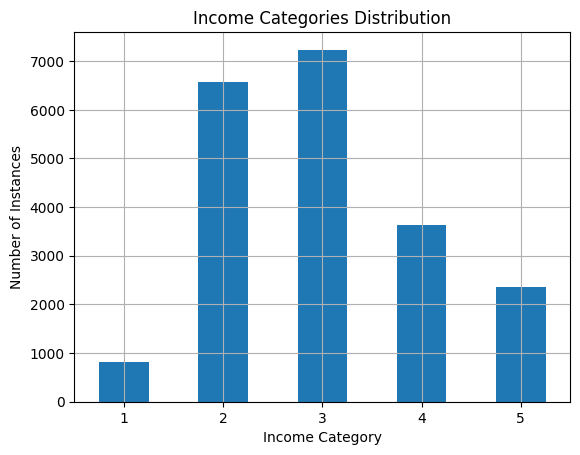

In [24]:
# Visualize the distribution of income categories
df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.ylabel("Number of Instances")
plt.show()

In [25]:
# Perform stratified sampling based on income category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [26]:
# Remove the 'income_cat' column after stratification
for sett in (strat_train_set, strat_test_set):
    sett.drop("income_cat", axis=1, inplace=True)

In [27]:
# Use the stratified training set for further analysis
df = strat_train_set.copy()

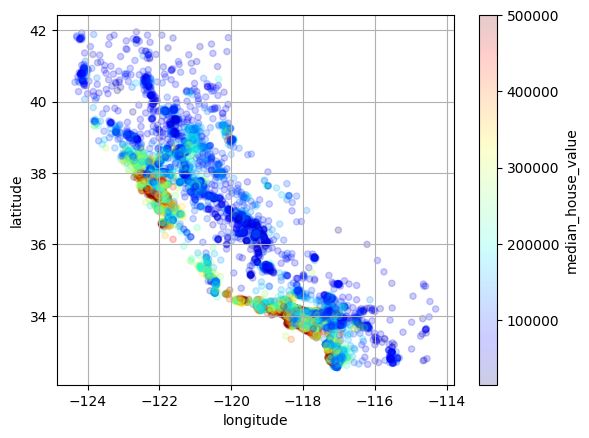

In [28]:
# Visualize geographical data: longitude vs latitude colored by house value
df.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2, cmap='jet', c='median_house_value')
plt.show()

In [29]:
# Drop the 'ocean_proximity' column and show correlations
df.drop('ocean_proximity', axis=1, inplace=True)
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


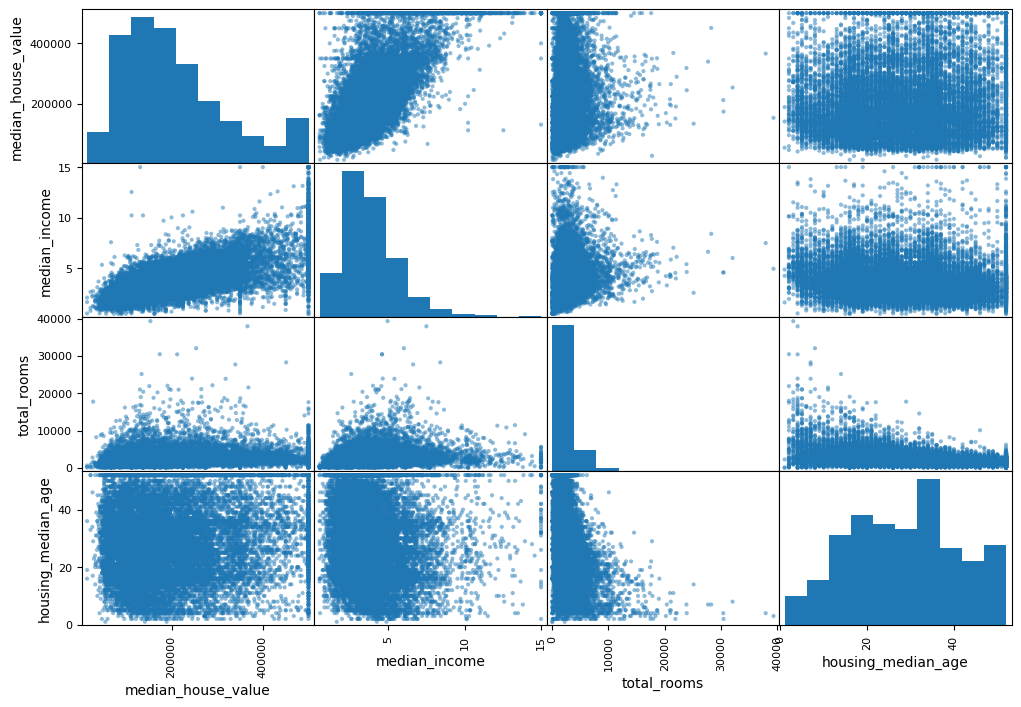

In [30]:
# Visualize Pairwise relationships among selected attributes
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

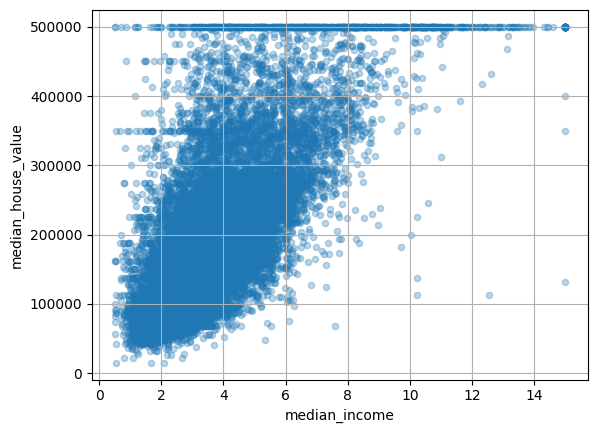

In [31]:
# Scatter plot: median income vs median house value 
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3, grid=True)

## **Conclusion and Next Steps for Preprocessing**

- `median_income` is the most important feature for predicting `median_house_value`.
- The `total_bedrooms` column contains missing values; these should be handled using techniques like Simple Imputer.
- `ocean_proximity` is a categorical feature and requires One Hot Encoding for model compatibility.
- Numerical attributes should be standardized using StandardScaler to improve model performance.

**Next:**  
Proceed with data cleaning, feature engineering, and building preprocessing pipelines before training your machine learning models.